In [1]:

import pandas as pd

df = pd.read_excel("D:\sascha\Documents\Master of Desaster\Masterarbeit\Datenerhebung\Datensätze\dataframe.xlsx",sheet_name="cleaned data")

In [2]:
import numpy as np

In [3]:
df

,Nr,Product,Value,File
0,0.0,Mean,1.380,001A.pdf
1,1.0,Mean,0.100,001A.pdf
2,2.0,Mean,0.380,001A.pdf
3,3.0,Mean,2.050,001A.pdf
4,4.0,Mean,1.000,001A.pdf
5,5.0,Mean,2.440,001A.pdf
6,6.0,Mean,2.170,001A.pdf
7,7.0,Mean,2.000,001A.pdf
8,8.0,Mean,4.810,001A.pdf
9,9.0,Mean,3.980,001A.pdf


In [4]:
data = df.values

In [5]:
# Names = Arrays von Namen der Paper und Kategorien
names_paper = np.unique(data[:,3])
names_category = np.unique(data[:,1])

# Anzahl der Namen von Paper und Kategorie
N_paper = names_paper.shape[0]
N_category = names_category.shape[0]

In [6]:
# Ziffernverteilung jedes Paper und jeder Kategorie
dist = np.zeros((N_paper,N_category,9))
# Ziffernverteilung jedes Paper aus der Kontrollgruppe und jeder Kategorie
dist_control = np.zeros((N_paper,N_category,9))
for i in range(data.shape[0]):
    entry = data[i]
    paper = entry[3]
    category = entry[1]
    value = float(entry[2])
    try:
        dist[np.where(names_paper == paper),np.where(names_category == category),int(str(1e10*value)[0])-1] += 1
        if not paper.endswith('A.pdf'):
            dist_control[np.where(names_paper == paper),np.where(names_category == category),int(str(1e10*value)[0])-1] += 1
    except:
        print(value,entry[2],i)
        #not fixed yet, weird!

nan nan 1914
nan nan 3923
nan nan 8058


In [7]:
from scipy.stats import fisher_exact

In [8]:
fisher_pValue = np.zeros((N_paper,N_category))

In [9]:
for i in range(N_paper):
    for j in range(N_category):
        entry_dist = dist[i,j]
        control_dist = np.delete(dist_control,i,0).sum(axis=0)[j]
        #control_dist = dist_control.sum(axis=0)[j]
        contingency_tab = np.zeros((2,2))
        #Pooling
        if entry_dist.sum() > 0:
            contingency_tab[0,0] = entry_dist[:3].sum()
            contingency_tab[0,1] = entry_dist[3:].sum()
            contingency_tab[1,0] = control_dist[:3].sum()
            contingency_tab[1,1] = control_dist[3:].sum()
            fisher_pValue[i,j] = fisher_exact(contingency_tab)[1]
        else:
            fisher_pValue[i,j] = 10#np.nan

In [10]:
np.savetxt('array.txt', contingency_tab)

In [11]:
control_dist

array([21., 36.,  5.,  4.,  0.,  1.,  2.,  0.,  1.])

In [12]:
import matplotlib.pyplot as plt

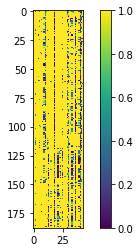

In [13]:
plt.imshow(fisher_pValue,vmax=1)
plt.colorbar()

In [14]:
#Anzahl p-Werte kleiner 0.05 für jedes paper
N_p005 = np.sum(1*(fisher_pValue<.05),axis=1)

In [15]:
#Anzahl p-Werte für jedes paper
N_cate = np.sum(1*np.logical_not(fisher_pValue==10),axis=1)

In [16]:
dieSchlechten = (N_p005/N_cate)[np.char.endswith(names_paper.astype(str),'A.pdf')]
dieGuten = (N_p005/N_cate)[np.logical_not(np.char.endswith(names_paper.astype(str),'A.pdf'))]

In [17]:
N_dieSchlechten = (1*np.char.endswith(names_paper.astype(str),'A.pdf')).sum()
N_dieGuten = (1*np.logical_not(np.char.endswith(names_paper.astype(str),'A.pdf'))).sum()

In [18]:
names = np.array(np.zeros(N_dieSchlechten+N_dieGuten),dtype=str)
pVals = np.array(np.zeros(N_dieSchlechten+N_dieGuten),dtype=list)
ratio = ratio = np.zeros(N_dieSchlechten+N_dieGuten)
hit = np.array(np.zeros(N_dieSchlechten+N_dieGuten))
nohit = np.array(np.zeros(N_dieSchlechten+N_dieGuten))
numberofpvalues = np.array (np.zeros(N_dieSchlechten+N_dieGuten))

bools = np.char.endswith(names_paper.astype(str),'A.pdf')
for i in range(N_dieSchlechten):
    names[i] = names_paper[bools][i]
    pValues = (fisher_pValue[bools][i])[(np.logical_not(fisher_pValue[bools]==10))[i]]
    pVals[i] = pValues.round(3).tolist()
    ratio[i] = 100*(np.sum(1*(pValues<.05))/pValues.shape[0])#.round(3)
    hit [i] = (np.sum(pValues<.05))
    nohit [i] = (np.sum(pValues>.05))
    numberofpvalues [i] = (np.sum(pValues.shape[0]))
    
bools = np.logical_not(np.char.endswith(names_paper.astype(str),'A.pdf'))
for i in range(N_dieGuten):
    names[N_dieSchlechten+i] = names_paper[bools][i]
    pValues = (fisher_pValue[bools][i])[(np.logical_not(fisher_pValue[bools]==10))[i]]
    pVals[N_dieSchlechten+i] = pValues.round(3).tolist()
    ratio[N_dieSchlechten+i] = 100*(np.sum(1*(pValues<.05))/pValues.shape[0])#.round(3)
    hit[N_dieSchlechten+i] = (np.sum(pValues<.05))
    nohit[N_dieSchlechten+i] = (np.sum(pValues>.05))
    numberofpvalues[N_dieSchlechten+i] = (np.sum(pValues.shape[0]))


In [19]:
# empty dataframe
df = pd.DataFrame()
# add the array to df as a column
df['Paper'] = names
df['p-Werte'] = pVals
df['Ratio'] = ratio
df['Zahl der p-Wert unter .05'] = hit
df['Zahl der p-Wert ueber .05'] = nohit
df['Gesamtzahl p-Werte'] = numberofpvalues

In [20]:
df.to_csv('data.csv',sep=';')

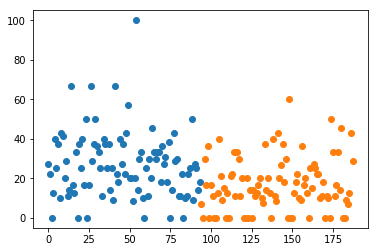

In [21]:
plt.plot(np.arange(N_dieSchlechten),ratio[:N_dieSchlechten],'C0o')
plt.plot(np.arange(N_dieSchlechten,N_dieSchlechten+N_dieGuten),ratio[N_dieSchlechten:],'C1o')

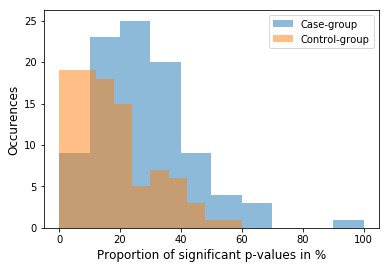

In [22]:
plt.hist(ratio[:N_dieSchlechten],alpha=.5,label=['Case-group'])
plt.hist(ratio[N_dieSchlechten:],alpha=.5,label=['Control-group'])

plt.legend()
plt.xlabel('Proportion of significant p-values in %', fontsize='large')
plt.ylabel('Occurences', fontsize='large')

plt.savefig('dieGutenDieSchlechten.png',dpi=300)

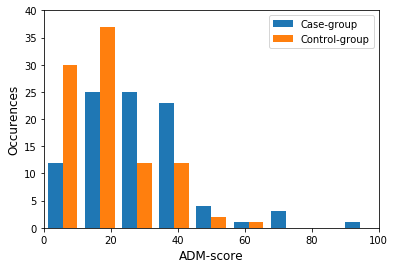

In [23]:
plt.hist(ratio.reshape((94,2),order='F'),bins=9,label=['Case-group','Control-group'])
plt.legend()
axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,40])
plt.xlabel('ADM-score', fontsize='large')
plt.ylabel('Occurences', fontsize='large')
plt.savefig('vielleichtbesser.png',dpi=300)

In [24]:
import numpy as np
from statsmodels.stats import contingency_tables
import pandas as pd
from scipy.stats import binom

In [36]:
ar=np.array([[10, 9], [10, 9]])    # Create DataFrame by passing a numpy array with our data. 
ct=pd.DataFrame(ar, columns=["p<.05", "p>.05"])
ct.index=["Case-group", "Control-group"] 
ct

,p<.05,p>.05
Case-group,10,9
Control-group,10,9


In [37]:
contingency_tables.mcnemar(ar,exact=True).pvalue

1.0

In [38]:
import statsmodels.api as sm
table = sm.stats.Table2x2(np.array([[217, 587], [149, 706]]))
table.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.752,,1.384,2.217,0.000
Log odds ratio,0.561,0.120,0.325,0.796,0.000
Risk ratio,1.549,,1.287,1.863,0.000
Log risk ratio,0.437,0.094,0.252,0.622,0.000


In [28]:
import pandas as pd

df = pd.read_csv (r'C:\Users\sascha\Desktop\data.csv', sep=";")


In [29]:
data = df.values


In [31]:
#Mann-Whitney-U test to compare means of Test-Scores

import numpy as np
import scipy.stats as stats

# Create two groups of data

group1 = [27.27272727,22.22222222,0
12.5
40
25
37.5
10
42.85714286
41.66666667
20
28.57142857
11.11111111
14.28571429
66.66666667
16.66666667
12.5
33.33333333
0
37.5
25
40
16.66666667
50
0
16.66666667
66.66666667
28.57142857
37.5
50
36.36363636
33.33333333
25
11.11111111
40
37.5
25
37.5
14.28571429
25
9.090909091
66.66666667
22.22222222
18.18181818
40
27.27272727
37.5
22.22222222
42.85714286
57.14285714
20
20
8.333333333
20
100
14.28571429
30
33.33333333
10
0
25
11.11111111
30
20
45.45454545
33.33333333
30
33.33333333
33.33333333
18.18181818
36.36363636
27.27272727
30.76923077
18.18181818
38.46153846
0
14.28571429
42.85714286
28.57142857
30
11.11111111
11.11111111
22.22222222
0
10
11.11111111
22.22222222
25
50
9.090909091
27.27272727
25
14.28571429
18.18181818]
group2 = [7.142857143
0
30
16.66666667
36.36363636
0
16.66666667
11.11111111
0
0
12.5
40
21.42857143
9.090909091
15.38461538
0
12.5
0
21.42857143
22.22222222
33.33333333
11.11111111
33.33333333
30
11.11111111
20
0
0
20
0
14.28571429
0
14.28571429
11.11111111
12.5
16.66666667
20
10
7.692307692
37.5
14.28571429
20
12.5
0
40
11.11111111
8.333333333
42.85714286
20
26.66666667
37.5
18.18181818
30
0
60
0
0
12.5
18.18181818
22.22222222
10
9.090909091
36.36363636
16.66666667
20
12.5
0
25
15.38461538
27.27272727
25
22.22222222
22.22222222
10
11.11111111
18.18181818
0
11.11111111
10
0
50
33.33333333
11.11111111
16.66666667
33.33333333
14.28571429
45.45454545
0
0
9.090909091
7.142857143
12.5
42.85714286
28.57142857]

# Calculate u and probability of a difference

u_statistic, pVal = stats.mannwhitneyu(group1, group2)

# Print results

print ('P value:')
print (pVal)


SyntaxError: invalid syntax (<ipython-input-31-f7a2ba58d84d>, line 9)